In [1]:
import os
import sys

In [2]:
home = os.environ['HOME']
work_path = os.path.join(home, 'far/farMe/landau')
src_path = os.path.join(home, 'far/PHARE')
build_path = os.path.join(home, 'far/builds/release/landau')

In [3]:
sys.path.append(os.path.join(src_path, "pyphare"))

In [4]:
import subprocess
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
from pyphare.core.ufuncs import gF, peakIds
import numpy as np
from numpy import polyfit

# First attempt with an ion acoustic wave

In [5]:
Ti = 0.1
Te = 0.2
run_name = "ld_g"

In [6]:
run_path = os.path.join(work_path, run_name)

In [7]:
if os.path.isdir(run_path):
    files = os.listdir(run_path)
else:
    files = []

In [8]:
if 'PYTHONPATH' in os.environ:
    os.environ['PYTHONPATH'] += os.pathsep + os.path.join(src_path, "pyphare")
else:
    os.environ['PYTHONPATH'] = os.pathsep + os.path.join(src_path, "pyphare")
os.environ['PYTHONPATH'] += os.pathsep + build_path

In [9]:
if 'EM_E.h5' not in files :
    os.chdir(work_path)
    # subprocess.run(['mpirun', '-n', '2', '/usr/bin/python3', work_path+'/ld.py', run_name, str(Te), str(Ti)], env=os.environ)
    subprocess.run(['/usr/bin/python3', work_path+'/ld_ai.py', run_name, str(Te), str(Ti)], env=os.environ)

validating dim=1
Error: cannot use density without population name
Error: missing population_name
mean advance time = 0.00913497793674469146.2sec
total advance time = 0:02:26.159647


In [10]:
run  = Run(run_path)

In [11]:
# times = np.arange(0, 33, 2)
times = np.arange(0, 81, 2)

In [12]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho
['rho']
value rho


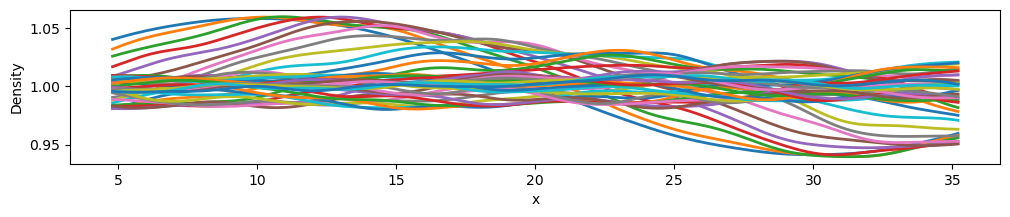

In [13]:
fig, ax = plt.subplots(figsize=(12,2))

for i, time in enumerate(times):
    N = run.GetNi(time)
    n = gF(N, sigma=6)
    # V = run.GetVi(time)
    # v = gF(V, sigma=6)

    n.plot(qty='value', ax=ax, ls='solid', lw=2.0, color=colors[i%10], ylabel='Density')

In [14]:
zob = run.GetE(0, merged=True)
print(type(zob), zob)

<class 'dict'> {'Ex': (<scipy.interpolate._interpolate.interp1d object at 0x7fcea5d14730>, (array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1,  9.3,  9.5,  9.7,  9.9, 10.1, 10.3, 10.5, 10.7, 10.9,
       11.1, 11.3, 11.5, 11.7, 11.9, 12.1, 12.3, 12.5, 12.7, 12.9, 13.1,
       13.3, 13.5, 13.7, 13.9, 14.1, 14.3, 14.5, 14.7, 14.9, 15.1, 15.3,
       15.5, 15.7, 15.9, 16.1, 16.3, 16.5, 16.7, 16.9, 17.1, 17.3, 17.5,
       17.7, 17.9, 18.1, 18.3, 18.5, 18.7, 18.9, 19.1, 19.3, 19.5, 19.7,
       19.9, 20.1, 20.3, 20.5, 20.7, 20.9, 21.1, 21.3, 21.5, 21.7, 21.9,
       22.1, 22.3, 22.5, 22.7, 22.9, 23.1, 23.3, 23.5, 23.7, 23.9, 24.1,
       24.3, 24.5, 24.7, 24.9, 25.1, 25.3, 25.5, 25.7, 25.9, 26.1, 26.3,
       26.5, 26.7, 26.9, 27.1, 2

In [15]:
zob = run.GetMassDensity(0, merged=True)

['rho']


In [16]:
zob = run.GetNi(0, merged=True)

['rho']


In [17]:
# zob = run.GetN(0, "protons", merged=True)

In [18]:
zob = run.GetVi(0, merged=True)

['Vx', 'Vy', 'Vz']


In [19]:
# zob = run.GetFlux(0, "protons", merged=True)

In [20]:
def sine_func(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

from scipy.optimize import curve_fit

Amp = np.zeros(times.shape)
for i, tim in enumerate(times):
    initial_guess = [0.1, 0.157, 0.0, 1.0]
    dn_func, x_fin = run.GetNi(tim, merged=True)['rho']
    x_ = x_fin[0]
    y_ = dn_func(x_)
    params, covariance = curve_fit(sine_func, x_, y_, p0=initial_guess)
    # print(params)
    A_fit, B_fit, C_fit, D_fit = params
    Amp[i] = np.fabs(A_fit)
print(Amp)

['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
['rho']
[0.05990476 0.05925116 0.05837152 0.05656376 0.05398825 0.05096226
 0.04766757 0.04520374 0.04083826 0.03641109 0.03641986 0.0328982
 0.02323088 0.01963374 0.01741582 0.0156938  0.01516713 0.01536523
 0.01609487 0.01690041 0.01666561 0.01770759 0.01771771 0.01678476
 0.01452069 0.01337701 0.01180445 0.01067301 0.00943719 0.00856309
 0.00822215 0.00839192 0.00798127 0.00796856 0.00811269 0.00776893
 0.00763018 0.0070736  0.00757645 0.00626183 0.00589802]


In [25]:
def exp_func(x, A, B, C):
    return A * np.exp(- B * x) + C

pivot = 10

from scipy.optimize import curve_fit

initial_guess = [0.04, 0.03, 0.0]
params, covariance = curve_fit(exp_func, times[pivot:], Amp[pivot:], p0=initial_guess)
A_fit, B_fit, C_fit = params

In [26]:
# params
# A_fit, B_fit, C_fit = initial_guess

Text(0, 0.5, '$N_1$ amplitude')

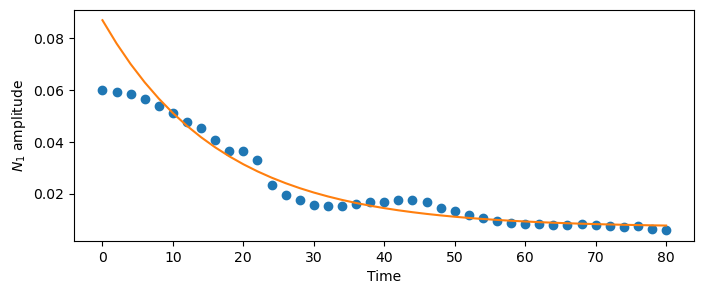

In [29]:
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(times, Amp, marker="o", color=colors[0], ls="None")
ax.plot(times, exp_func(times, A_fit, B_fit, C_fit), color=colors[1])

### ax1.axvspan(x_start, x_end, color=color, alpha=0.35) TODO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# ax.text(20, 100, 'positive slope : {:.3f}'.format(slope_p))
# ax.text(20, 20, 'negative slope : {:.3f}'.format(slope_m))

# ax.set_ylim([0, 128])
ax.set_xlabel('Time')
ax.set_ylabel('$N_1$ amplitude')

In [28]:
print("numerical fit  : {:.4f}".format(B_fit))
L = 40
k = 2*np.pi/L
Gamma_e = 1
Gamma_i = 3
cs = np.sqrt(Gamma_e*Te+Gamma_i*Ti)
gamma_landau = np.sqrt(np.pi/8) * k * cs * np.power(Te/Ti, 1.5) * np.exp(- 0.5*Te/Ti)
print("analytical fit : {:.4f}".format(gamma_landau))

numerical fit  : 0.0595
analytical fit : 0.0724


# Meaningless run with a Landau wave

In [ ]:
Ti = 0.1
Te = 0.2
run_name = "ld_b"

In [ ]:
run_path = os.path.join(work_path, run_name)

In [ ]:
if os.path.isdir(run_path):
    files = os.listdir(run_path)
else:
    files = []

In [ ]:
if 'PYTHONPATH' in os.environ:
    os.environ['PYTHONPATH'] += os.pathsep + os.path.join(src_path, "pyphare")
else:
    os.environ['PYTHONPATH'] = os.pathsep + os.path.join(src_path, "pyphare")
os.environ['PYTHONPATH'] += os.pathsep + build_path

In [ ]:
if 'EM_B.h5' not in files :
    os.chdir(work_path)
    # subprocess.run(['mpirun', '-n', '2', '/usr/bin/python3', work_path+'/ld.py', run_name, str(Te), str(Ti)], env=os.environ)
    subprocess.run(['/usr/bin/python3', work_path+'/ld_kaw.py', run_name, str(Te), str(Ti)], env=os.environ)

In [ ]:
run  = Run(run_path)

In [ ]:
times = np.arange(0, 81, 4)

In [ ]:
fig, ax = plt.subplots(figsize=(12,2))

for i, time in enumerate(times[6:10]):
    V = run.GetVi(time)
    B = run.GetB(time)
    
    B.plot(qty='y', ax=ax, ls='solid', lw=2.0, color=colors[i%10], ylabel='$B_y$')

In [ ]:
by_func, x_fin = run.GetB(time, merged=True)['By']
# type(x_fin[0]), type(by_func(x_fin[0]))

In [ ]:
from scipy.optimize import curve_fit

def sine_func(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

In [ ]:
tim = 10
initial_guess = [1, 1.57, 0.0, 0.0]
by_func, x_fin = run.GetB(tim, merged=True)['By']

In [ ]:
x_ = x_fin[0]
y_ = by_func(x_)
params, covariance = curve_fit(sine_func, x_, y_, p0=initial_guess)
A_fit, B_fit, C_fit, D_fit = params

In [ ]:
params

In [ ]:
Amp = np.zeros(times.shape)
for i, tim in enumerate(times):
    initial_guess = [1, 1.57, 0.0, 0.0]
    by_func, x_fin = run.GetB(tim, merged=True)['By']
    x_ = x_fin[0]
    y_ = by_func(x_)
    params, covariance = curve_fit(sine_func, x_, y_, p0=initial_guess)
    # print(params)
    A_fit, B_fit, C_fit, D_fit = params
    Amp[i] = np.fabs(A_fit)
    print(A_fit)

In [ ]:
Amp

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(times, Amp)